- create a dataframe of building metadata with 'customerType' as a separate column
- define a dataframe of office buildings -> get list of office building ID-s
- query Zone temperature data for office buildings
- resample the data to hourly resolution
- plot for arbitrary time periods


In [1]:
# install API wrapper first
!pip install onboard.client --user
import pandas as pd
from onboard.client import RtemClient

In [2]:
api_key = 'ob-p-Pi3gHy3uWTb3y6ZqL74dbcTCHIekYB6UwBOCDCHxlkkWSZhVh6TV-UY4lkwYWt6BhvI'
client = RtemClient(api_key=api_key)

Define a list of office buildings:

In [3]:
bdgs=pd.json_normalize(client.get_all_buildings())

In [4]:
bdgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 229 non-null    int64  
 1   org_id             229 non-null    int64  
 2   name               229 non-null    object 
 3   address            0 non-null      object 
 4   sq_ft              201 non-null    float64
 5   image_src          0 non-null      object 
 6   bms_manufacturer   0 non-null      object 
 7   bms_product_name   0 non-null      object 
 8   bms_version        0 non-null      object 
 9   timezone           229 non-null    object 
 10  status             229 non-null    object 
 11  equip_count        229 non-null    int64  
 12  point_count        229 non-null    int64  
 13  info.floors        224 non-null    object 
 14  info.m2fend        224 non-null    object 
 15  info.satend        223 non-null    object 
 16  info.sunend        223 non

In [5]:
bdgs['info.customerType']

0            Multifamily
1      Commercial Office
2      Commercial Retail
3                       
4            Multifamily
             ...        
224    Commercial Retail
225          Hospitality
226    Commercial Office
227    Commercial Office
228    Commercial Office
Name: info.customerType, Length: 229, dtype: object

In [6]:
office_bdgs=bdgs.loc[bdgs['info.customerType'] == "Commercial Office"]

In [7]:
office_bdgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 228
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 46 non-null     int64  
 1   org_id             46 non-null     int64  
 2   name               46 non-null     object 
 3   address            0 non-null      object 
 4   sq_ft              39 non-null     float64
 5   image_src          0 non-null      object 
 6   bms_manufacturer   0 non-null      object 
 7   bms_product_name   0 non-null      object 
 8   bms_version        0 non-null      object 
 9   timezone           46 non-null     object 
 10  status             46 non-null     object 
 11  equip_count        46 non-null     int64  
 12  point_count        46 non-null     int64  
 13  info.floors        44 non-null     object 
 14  info.m2fend        44 non-null     object 
 15  info.satend        43 non-null     object 
 16  info.sunend        43 non-n

In [8]:
id_of_offices = office_bdgs['id'].tolist()

In [9]:
id_of_offices

[140,
 470,
 439,
 314,
 107,
 488,
 417,
 438,
 485,
 450,
 452,
 489,
 98,
 134,
 217,
 103,
 142,
 503,
 454,
 112,
 440,
 121,
 120,
 484,
 129,
 115,
 486,
 465,
 487,
 137,
 141,
 146,
 174,
 194,
 185,
 234,
 246,
 242,
 275,
 286,
 392,
 394,
 393,
 383,
 398,
 399]

In [10]:
from onboard.client.models import PointSelector
query = PointSelector()

In [11]:
query.point_types = ['Zone Temperature']
query.equipment_types = ['fcu']
query.buildings = id_of_offices

In [12]:
selection = client.select_points(query)
type(selection)

dict

In [13]:
points = selection["points"]
len(points)

24

In [14]:
sensor_metadata = client.get_points_by_ids(points)
pd.DataFrame(sensor_metadata);

In [15]:
from datetime import datetime, timezone

In [16]:
# The starting point of Unix Time
datetime.fromtimestamp(0, timezone.utc)

datetime.datetime(1970, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [17]:
sensor_metadata = pd.DataFrame(sensor_metadata)
sensor_metadata.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc))

0    2020-03-31 04:00:00+00:00
1    2020-03-31 04:00:00+00:00
2    2020-03-31 04:00:00+00:00
3    2020-03-31 04:00:00+00:00
4    2020-03-31 04:00:00+00:00
5    2020-03-31 04:00:00+00:00
6    2020-03-31 04:00:00+00:00
7    2020-03-31 04:00:00+00:00
8    2020-03-31 04:00:00+00:00
9    2020-03-31 04:00:00+00:00
10   2020-03-31 04:00:00+00:00
11   2020-03-31 04:00:00+00:00
12   2020-03-31 04:00:00+00:00
13   2020-03-31 04:00:00+00:00
14   2020-03-31 04:00:00+00:00
15   2020-03-31 04:00:00+00:00
16   2020-03-31 04:00:00+00:00
17   2020-03-31 04:00:00+00:00
18   2020-03-31 04:00:00+00:00
19   2020-03-31 04:00:00+00:00
20   2020-03-31 04:00:00+00:00
21   2020-03-31 04:00:00+00:00
22   2020-03-31 04:00:00+00:00
23   2021-07-08 00:15:00+00:00
Name: last_updated, dtype: datetime64[ns, UTC]

In [18]:
sensor_metadata.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min()

Timestamp('2018-10-07 12:45:00+0000', tz='UTC')

In [19]:
sensor_metadata.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max()

Timestamp('2021-07-08 00:15:00+0000', tz='UTC')

In [20]:
import pytz
from onboard.client.models import TimeseriesQuery, PointData
from onboard.client.dataframes import points_df_from_streaming_timeseries

In [21]:
# Select your timezone
tz = pytz.timezone('UTC')

# Select your date and time (time is optional)
start = datetime(2019,10,1,0,0,0).replace(tzinfo=tz)
end = datetime(2019,10,31,0,0,0).replace(tzinfo=tz)

print(f"from {start} to {end}")

from 2019-10-01 00:00:00+00:00 to 2019-10-31 00:00:00+00:00


In [22]:
timeseries_query = TimeseriesQuery(point_ids = points, start = start, end = end)

In [23]:
# Exceute query (will return and object)
query_results = client.stream_point_timeseries(timeseries_query)

# Convert to dataframe
sensor_data = points_df_from_streaming_timeseries(query_results)

In [24]:
sensor_data.head()

,timestamp,194302,194303,194304,194305,194306,194307,194308,194309,194310,194311,194312,194313,194314,194315,194316,194317,194318,194319,194320,194321,194322,267044,194300,194301
0,2019-10-01T00:15:00Z,21.664815,20.720370,21.164815,22.442593,23.387037,22.775926,18.053704,20.331481,19.942593,21.831481,21.275926,21.442593,22.053704,20.220370,23.998148,20.942593,21.998148,20.164815,19.498148,20.442593,22.609259,NaN,22.998148,22.942593
1,2019-10-01T00:30:00Z,21.775926,20.720370,21.164815,22.498148,23.664815,23.553704,22.109259,20.442593,20.109259,21.720370,20.942593,20.609259,22.109259,21.498148,24.275926,20.942593,21.498148,20.164815,19.498148,19.275926,21.775926,NaN,22.998148,22.998148
2,2019-10-01T00:45:00Z,21.887037,20.609259,20.998148,22.553704,23.609259,22.720370,20.887037,20.442593,19.998148,21.664815,21.164815,20.887037,22.053704,21.553704,24.442593,20.720370,21.609259,19.998148,19.442593,19.442593,22.109259,NaN,22.831481,22.998148
3,2019-10-01T01:00:00Z,21.609259,20.664815,20.887037,22.553704,24.331481,22.887037,20.887037,20.553704,19.609259,21.609259,20.109259,20.831481,22.053704,18.942593,23.998148,20.775926,22.164815,19.942593,19.442593,19.442593,21.887037,NaN,22.998148,22.998148
4,2019-10-01T01:15:00Z,21.498148,20.775926,20.998148,22.609259,23.109259,22.887037,18.498148,20.553704,19.887037,21.442593,20.998148,21.442593,21.942593,20.275926,24.387037,20.553704,22.387037,19.998148,19.442593,19.109259,22.609259,NaN,23.720370,23.109259


Try converting the time to a datetime object:

In [25]:
sensor_data["timestamp"] = pd.to_datetime(sensor_data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

In [26]:
sensor_data.head()

,timestamp,194302,194303,194304,194305,194306,194307,194308,194309,194310,194311,194312,194313,194314,194315,194316,194317,194318,194319,194320,194321,194322,267044,194300,194301
0,2019-10-01 00:15:00+00:00,21.664815,20.720370,21.164815,22.442593,23.387037,22.775926,18.053704,20.331481,19.942593,21.831481,21.275926,21.442593,22.053704,20.220370,23.998148,20.942593,21.998148,20.164815,19.498148,20.442593,22.609259,NaN,22.998148,22.942593
1,2019-10-01 00:30:00+00:00,21.775926,20.720370,21.164815,22.498148,23.664815,23.553704,22.109259,20.442593,20.109259,21.720370,20.942593,20.609259,22.109259,21.498148,24.275926,20.942593,21.498148,20.164815,19.498148,19.275926,21.775926,NaN,22.998148,22.998148
2,2019-10-01 00:45:00+00:00,21.887037,20.609259,20.998148,22.553704,23.609259,22.720370,20.887037,20.442593,19.998148,21.664815,21.164815,20.887037,22.053704,21.553704,24.442593,20.720370,21.609259,19.998148,19.442593,19.442593,22.109259,NaN,22.831481,22.998148
3,2019-10-01 01:00:00+00:00,21.609259,20.664815,20.887037,22.553704,24.331481,22.887037,20.887037,20.553704,19.609259,21.609259,20.109259,20.831481,22.053704,18.942593,23.998148,20.775926,22.164815,19.942593,19.442593,19.442593,21.887037,NaN,22.998148,22.998148
4,2019-10-01 01:15:00+00:00,21.498148,20.775926,20.998148,22.609259,23.109259,22.887037,18.498148,20.553704,19.887037,21.442593,20.998148,21.442593,21.942593,20.275926,24.387037,20.553704,22.387037,19.998148,19.442593,19.109259,22.609259,NaN,23.720370,23.109259


Resample the data to hourly frequency:

In [27]:
sensor_data_hourly=sensor_data.resample('H', on="timestamp").mean()

In [28]:
sensor_data_hourly.head()

,194302,194303,194304,194305,194306,194307,194308,194309,194310,194311,194312,194313,194314,194315,194316,194317,194318,194319,194320,194321,194322,267044,194300,194301
timestamp,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,21.775926,20.683333,21.109259,22.498148,23.553704,23.016667,20.350000,20.405556,20.016667,21.738889,21.127778,20.979630,22.072222,21.090741,24.238889,20.868519,21.701852,20.109259,19.479630,19.720370,22.164815,NaN,22.942593,22.979630
2019-10-01 01:00:00+00:00,21.525926,20.692593,20.859259,22.595370,23.914815,23.095370,19.873148,20.553704,19.692593,21.400926,20.817593,21.039815,22.025926,19.637037,24.275926,20.262037,21.970370,19.887037,19.442593,19.442593,22.234259,NaN,23.637037,23.137037
2019-10-01 02:00:00+00:00,21.289815,20.470370,20.595370,22.553704,23.831481,23.289815,20.678704,20.428704,19.248148,21.164815,20.345370,20.762037,22.067593,19.775926,24.234259,20.789815,21.928704,19.664815,19.387037,19.678704,21.762037,NaN,24.400926,23.373148
2019-10-01 03:00:00+00:00,21.150926,20.400926,20.414815,22.414815,24.275926,23.248148,19.012037,20.164815,19.081481,21.067593,19.887037,20.650926,22.067593,19.442593,24.414815,20.275926,21.887037,19.512037,19.331481,19.289815,21.692593,NaN,24.484259,23.428704
2019-10-01 04:00:00+00:00,21.609259,21.095370,22.206481,22.637037,23.373148,23.456481,20.803704,20.984259,20.900926,21.512037,22.220370,20.928704,22.762037,23.234259,25.664815,21.525926,22.275926,20.734259,20.234259,21.025926,22.387037,NaN,24.442593,23.359259


In [29]:
#sensor_data_hourly.to_csv("OfficeZoneTemperature_FCUsensor_data_hourly.csv", index=True)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is for the visual stype, I like "ggplot"
plt.style.use('ggplot')

# This for the figure size
plt.rcParams["figure.figsize"] = (20,9)

Delete the timestamp column, otherwise Spyder gives an error when plotting. You can skip the next step.

In [31]:
#sensor_data_NoTime=sensor_data.drop('timestamp',1)

TypeError: float() argument must be a string or a number, not 'Timestamp'

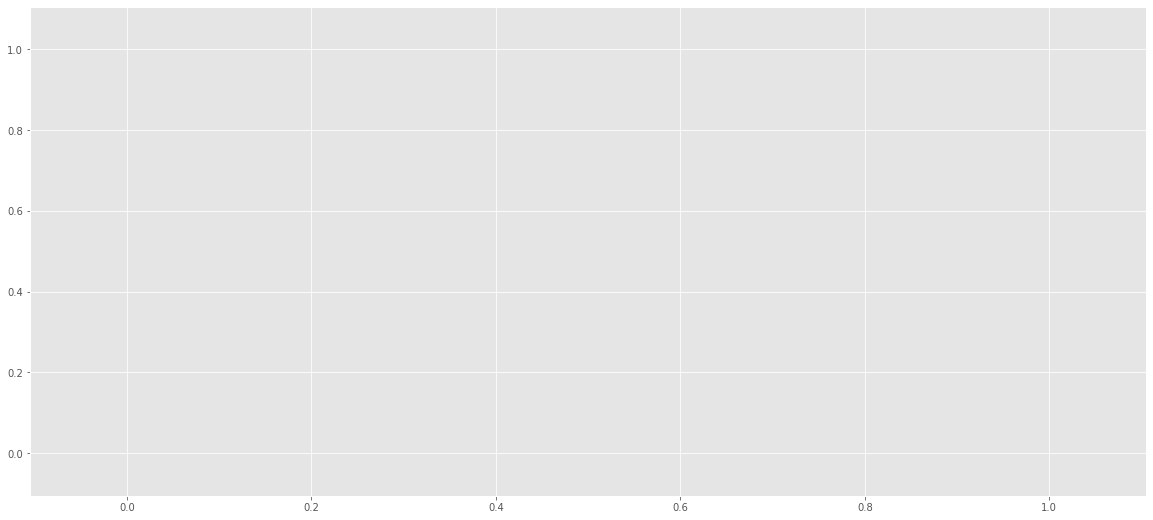

In [32]:
sns.lineplot(data=sensor_data_hourly, dashes=False)

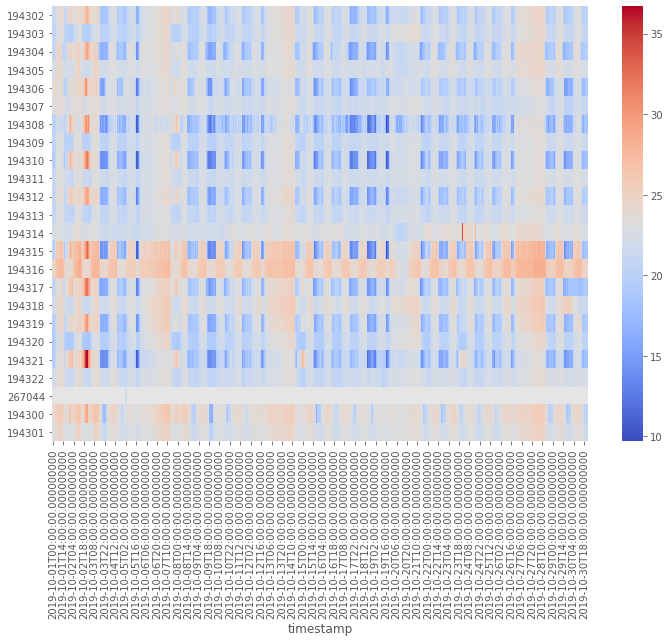

In [85]:
fig1 = sns.heatmap(sensor_data_hourly.T, cmap="coolwarm")
#plt.savefig(fname='HeatMap_1.svg', dpi=300, format='svg')

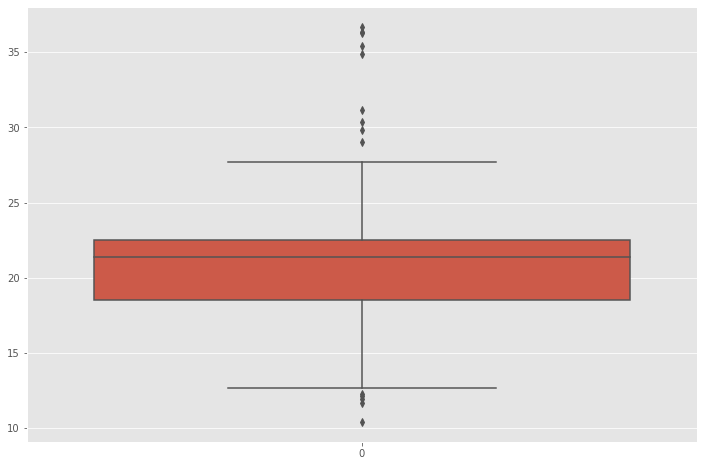

In [81]:
sel_points=194321
plt.rcParams["figure.figsize"] = (12,8)
fig3 = sns.boxplot(data=sensor_data_hourly[sel_points])
#plt.savefig(fname='Pareto_scatter.svg', dpi=300, format='svg')